In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
from PIL import Image
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation  , Dropout , BatchNormalization

from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install kaggle

from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

!unzip brain-tumor-mri-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

In [3]:
train_data='/content/Training'
filepaths=[]
labels=[]

folds=os.listdir(train_data)

for fold in folds:
    foldpath=os.path.join(train_data,fold)
    filelist=os.listdir(foldpath)

    for fpath in filelist:
        fillpath=os.path.join(foldpath,fpath)

        labels.append(fold)
        filepaths.append(fillpath)

file_series=pd.Series(filepaths,name='filepaths')
label_series=pd.Series(labels,name='labels')
train_df=pd.concat([file_series,label_series],axis=1)

train_df

filepaths   labels
0     /content/Training/notumor/Tr-no_1429.jpg  notumor
1     /content/Training/notumor/Tr-no_0257.jpg  notumor
2     /content/Training/notumor/Tr-no_0273.jpg  notumor
3     /content/Training/notumor/Tr-no_0474.jpg  notumor
4     /content/Training/notumor/Tr-no_1138.jpg  notumor
...                                        ...      ...
5707   /content/Training/glioma/Tr-gl_0496.jpg   glioma
5708   /content/Training/glioma/Tr-gl_0967.jpg   glioma
5709   /content/Training/glioma/Tr-gl_0419.jpg   glioma
5710   /content/Training/glioma/Tr-gl_1071.jpg   glioma
5711   /content/Training/glioma/Tr-gl_0697.jpg   glioma

[5712 rows x 2 columns]

In [4]:
test_data='/content/Testing'
filepaths=[]
labels=[]

folds=os.listdir(test_data)

for fold in folds:
    foldpath=os.path.join(test_data,fold)
    filelist=os.listdir(foldpath)

    for fpath in filelist:
        fillpath=os.path.join(foldpath,fpath)

        labels.append(fold)
        filepaths.append(fillpath)

file_series=pd.Series(filepaths,name='filepaths')
label_series=pd.Series(labels,name='labels')
ts_df=pd.concat([file_series,label_series],axis=1)

ts_df

filepaths   labels
0      /content/Testing/notumor/Te-no_0122.jpg  notumor
1      /content/Testing/notumor/Te-no_0166.jpg  notumor
2      /content/Testing/notumor/Te-no_0316.jpg  notumor
3      /content/Testing/notumor/Te-no_0258.jpg  notumor
4      /content/Testing/notumor/Te-no_0267.jpg  notumor
...                                        ...      ...
1306    /content/Testing/glioma/Te-gl_0272.jpg   glioma
1307  /content/Testing/glioma/Te-glTr_0000.jpg   glioma
1308    /content/Testing/glioma/Te-gl_0253.jpg   glioma
1309    /content/Testing/glioma/Te-gl_0150.jpg   glioma
1310    /content/Testing/glioma/Te-gl_0062.jpg   glioma

[1311 rows x 2 columns]

In [5]:
fig= px.histogram(data_frame= train_df,
           y= train_df['labels'],
           template='plotly_dark',
           color=train_df['labels'].values,
           title='number of images in each class of the train data')
fig.show()

In [6]:
fig= px.histogram(data_frame= ts_df,
           y= ts_df['labels'],
           template='plotly_dark',
           color=ts_df['labels'].values,
           title='number of images in each class of the test data')
fig.show()

In [7]:
val_df, test_df= train_test_split(ts_df,test_size=0.5,random_state= 43)
val_df

filepaths      labels
185    /content/Testing/notumor/Te-noTr_0000.jpg     notumor
436   /content/Testing/meningioma/Te-me_0242.jpg  meningioma
1149      /content/Testing/glioma/Te-gl_0121.jpg      glioma
999    /content/Testing/pituitary/Te-pi_0071.jpg   pituitary
671   /content/Testing/meningioma/Te-me_0294.jpg  meningioma
...                                          ...         ...
307      /content/Testing/notumor/Te-no_0174.jpg     notumor
16       /content/Testing/notumor/Te-no_0257.jpg     notumor
58       /content/Testing/notumor/Te-no_0253.jpg     notumor
277      /content/Testing/notumor/Te-no_0249.jpg     notumor
255      /content/Testing/notumor/Te-no_0335.jpg     notumor

[655 rows x 2 columns]

In [8]:
batch_size = 16
image_size = (224, 224)

train_genrator = ImageDataGenerator()
test_genrator = ImageDataGenerator()


train_genrator = train_genrator.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= image_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_genrator = test_genrator.flow_from_dataframe( val_df, x_col= 'filepaths', y_col= 'labels', target_size= image_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_genrator = test_genrator.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= image_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


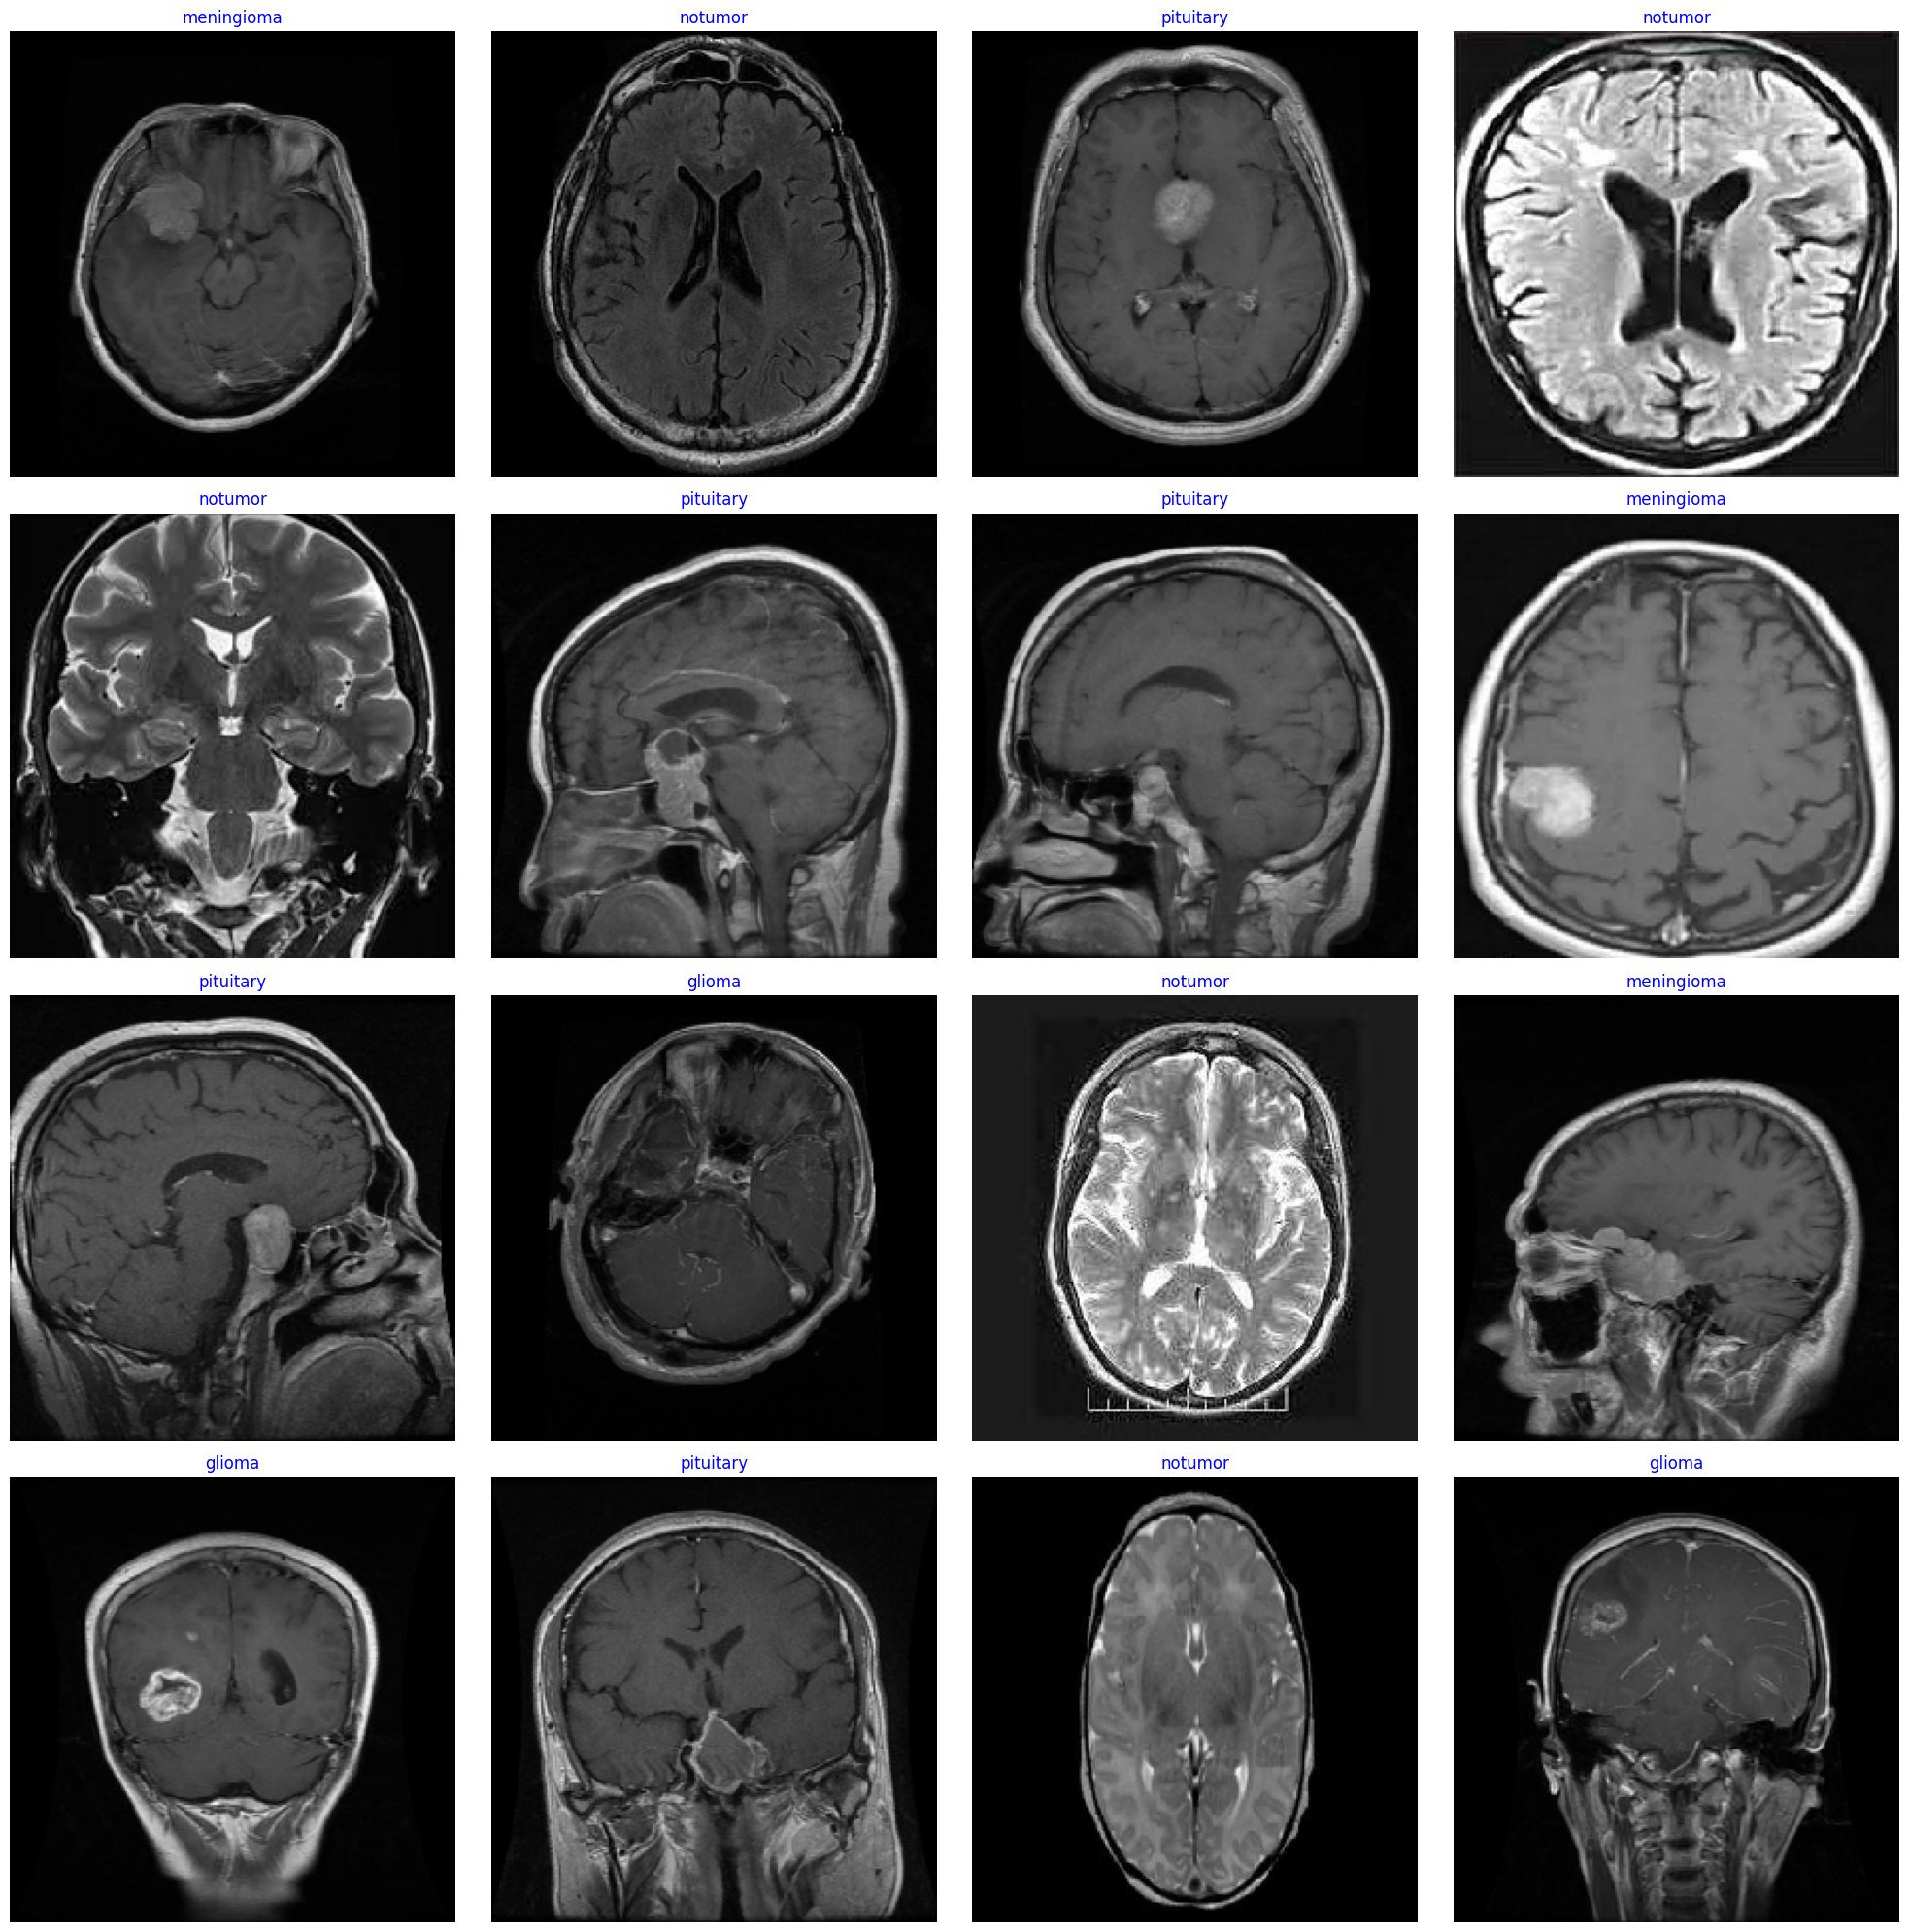

In [9]:
g_dict = train_genrator.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_genrator)      # get a batch size samples from the generator
# # difference between next iterator and for iterator


plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [10]:
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

class_count = len(list(train_genrator.class_indices.keys())) # to define number of classes in dense layer

model = Sequential([
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", input_shape= img_shape),
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(256,activation = "relu"),
    Dense(64,activation = "relu"),
    Dense(class_count, activation = "softmax")
])
model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,154,180 (80.70 MB)

 Trainable params: 21,154,180 (80.70 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(train_genrator, epochs= 10, verbose= 1, validation_data= valid_genrator, shuffle= False)

Epoch 1/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 142s 310ms/step - accuracy: 0.4367 - loss: 4.5152 - val_accuracy: 0.7481 - val_loss: 0.6543
Epoch 2/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 92s 258ms/step - accuracy: 0.7860 - loss: 0.5280 - val_accuracy: 0.7939 - val_loss: 0.4962
Epoch 3/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 92s 259ms/step - accuracy: 0.8702 - loss: 0.3505 - val_accuracy: 0.8336 - val_loss: 0.3516
Epoch 4/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 92s 258ms/step - accuracy: 0.8934 - loss: 0.2803 - val_accuracy: 0.8794 - val_loss: 0.3352
Epoch 5/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 92s 258ms/step - accuracy: 0.9199 - loss: 0.2127 - val_accuracy: 0.8153 - val_loss: 0.4705
Epoch 6/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 92s 258ms/step - accuracy: 0.9212 - loss: 0.2213 - val_accuracy: 0.9084 - val_loss: 0.2384
Epoch 7/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 92s 258ms/step - accuracy: 0.9421 - loss: 0.1610 - val_accuracy: 0.8916 - val_loss: 0.2516
Epoch 8/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 142s 259ms/step - accuracy: 0.9489 - loss:

In [13]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

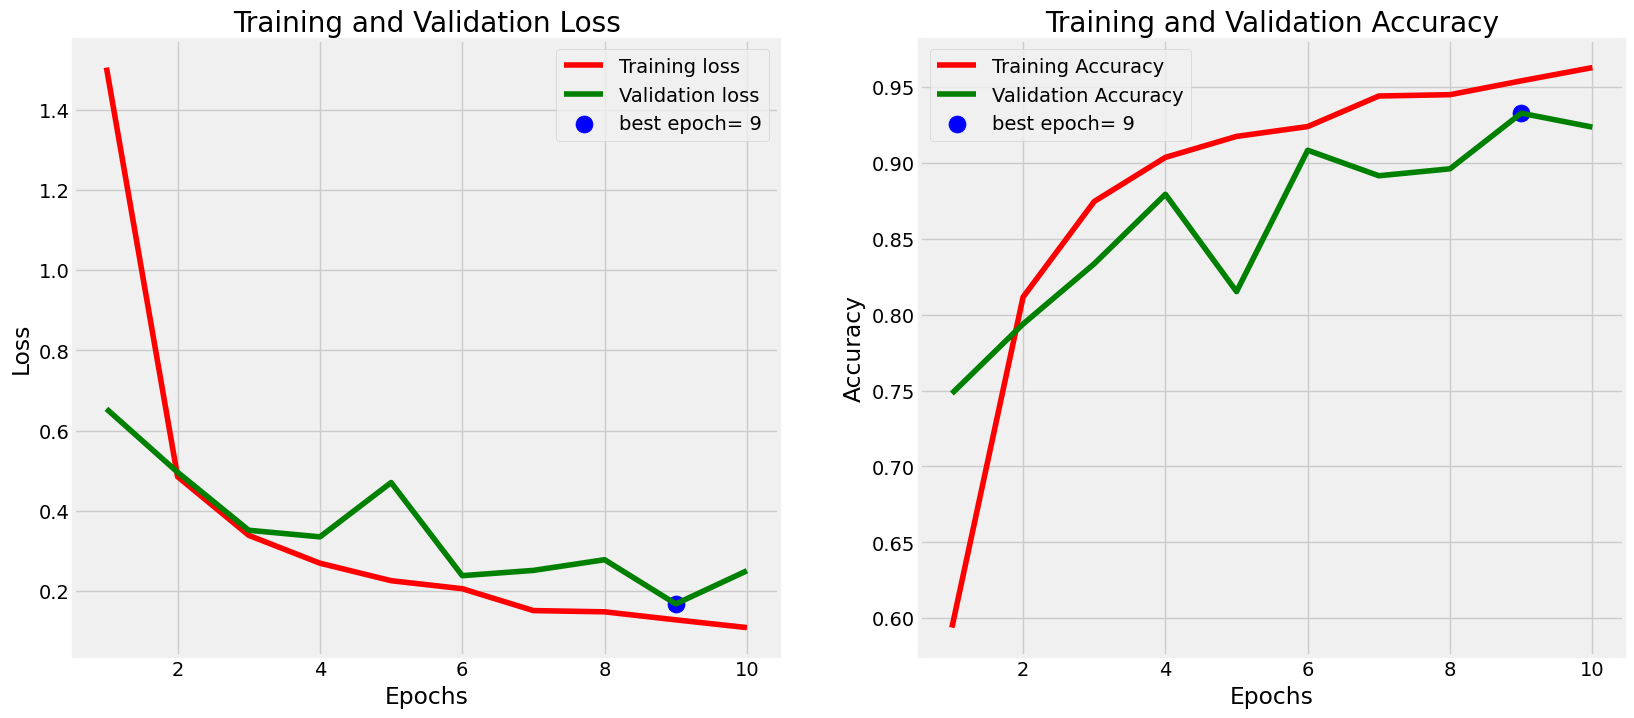

In [14]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [15]:
train_score = model.evaluate(train_genrator, verbose= 1)
valid_score = model.evaluate(valid_genrator, verbose= 1)
test_score = model.evaluate(test_genrator, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

357/357 ━━━━━━━━━━━━━━━━━━━━ 24s 68ms/step - accuracy: 0.9715 - loss: 0.0816
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.9190 - loss: 0.2662
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.9230 - loss: 0.2485
Train Loss:  0.07737618684768677
Train Accuracy:  0.9716386795043945
--------------------
Validation Loss:  0.25070881843566895
Validation Accuracy:  0.9236640930175781
--------------------
Test Loss:  0.1907622516155243
Test Accuracy:  0.9405487775802612


In [16]:
preds = model.predict(test_genrator)  # [0.00001, 95.12312, 0.0021, 3.12313]
y_pred = np.argmax(preds, axis=1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step


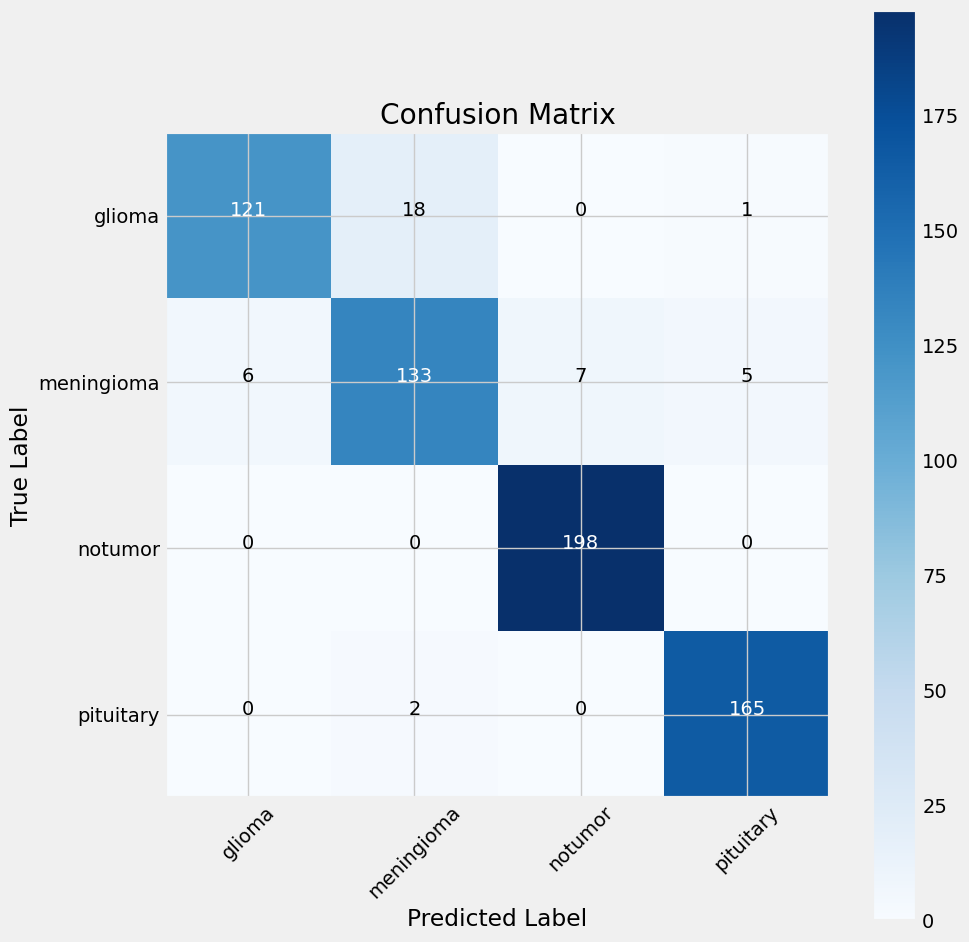

In [17]:
g_dict = test_genrator.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_genrator.classes, y_pred)
cm
plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [12]:
def plot_sample_predictions(model, test_generator, categories, test_dir, num_samples=9, figsize=(12, 8)):
    """
    Nice display of prediction samples to see CNN predictions
    for classification.
    """
    # Make predictions on the test dataset
    predictions = model.predict(test_generator)
    predicted_categories = np.argmax(predictions, axis=1)
    true_categories = test_generator.classes

    # Randomly sample test images
    test_images = np.array(test_generator.filepaths)
    sample_indices = np.random.choice(len(test_images), size=num_samples, replace=False)
    sample_images = test_images[sample_indices]
    sample_predictions = [categories[predicted_categories[i]] for i in sample_indices]
    sample_true_labels = [categories[true_categories[i]] for i in sample_indices]

    # Plot sample images with their predicted and true labels
    plt.figure(figsize=figsize)

    # Loop over samples
    for i, image_path in enumerate(sample_images):
        # Form subplot and plot
        plt.subplot(3, 3, i + 1)
        img = plt.imread(image_path)
        plt.imshow(img)
        plt.axis("off")

        # Set axis label color depending on correct prediction or not
        prediction_color = 'green' if sample_predictions[i] == sample_true_labels[i] else 'red'
        plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}", color=prediction_color)

    plt.tight_layout()
    plt.show()

41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step


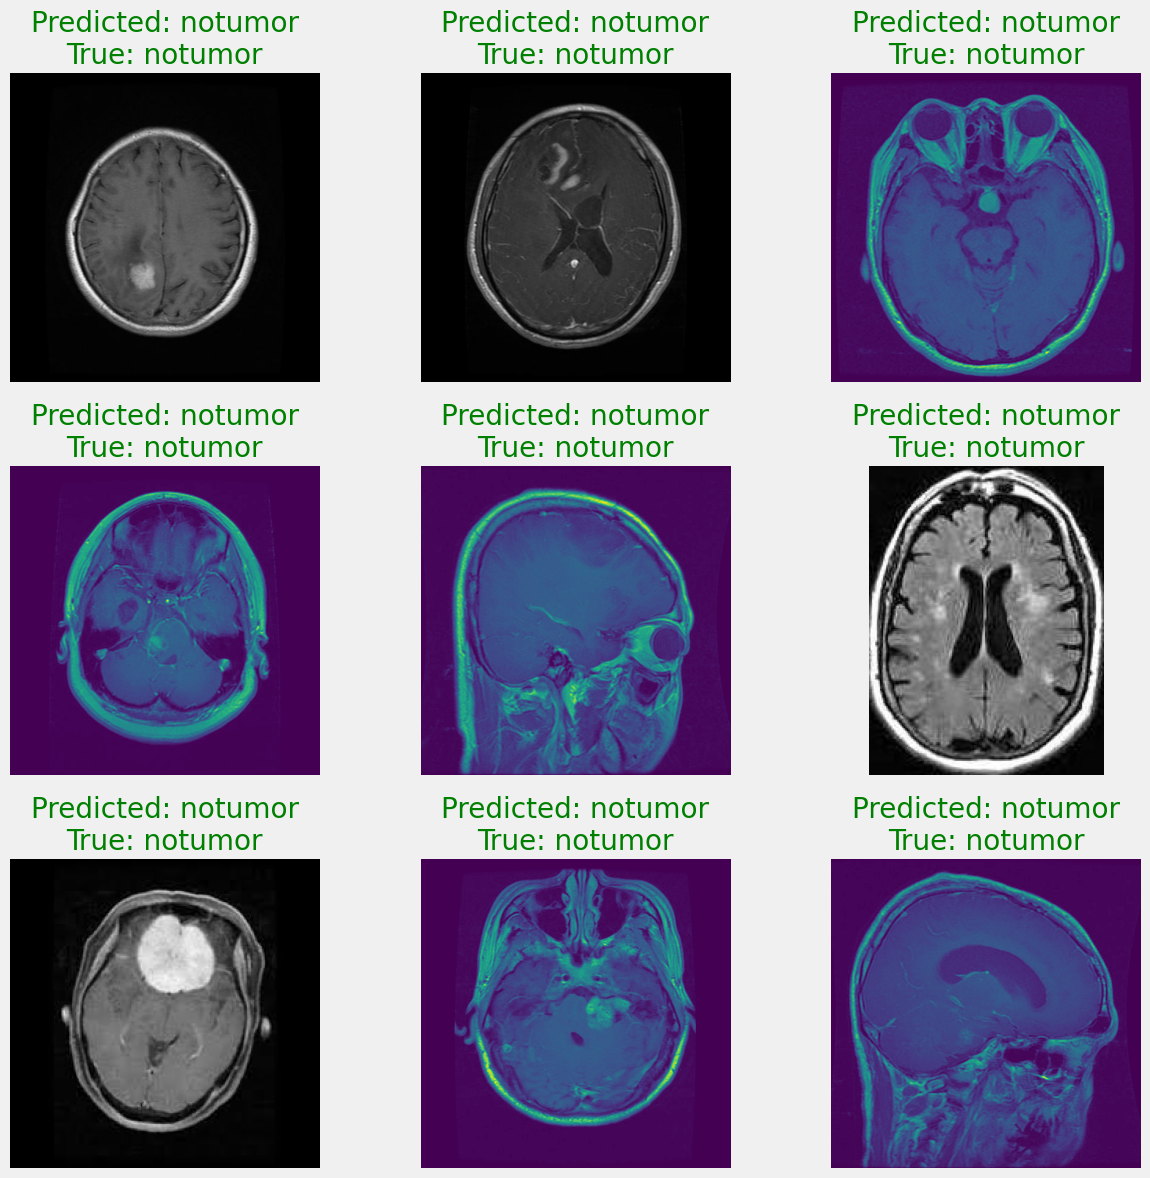

In [18]:
# Accessing class indices for training data generator

# Using functions in 6.1 for showing results
plot_sample_predictions(model=model,
                        test_generator=test_genrator,
                        categories=ts_df['labels'],
                        test_dir=test_data,
                        num_samples=9,
                        figsize=(13, 12))

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.
Training EfficientNet model
Epoch 1/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 62s 107ms/step - accuracy: 0.7993 - loss: 0.5336 - val_accuracy: 0.8748 - val_loss: 0.3362
Epoch 2/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 54s 50ms/step - accuracy: 0.9005 - loss: 0.2653 - val_accuracy: 0.8931 - val_loss: 0.2913
Epoch 3/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.9181 - loss: 0.2174 - val_accuracy: 0.8855 - val_loss: 0.2476
Epoch 4/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.9284 - loss: 0.1932 - val_accuracy: 0.9130 - val_loss: 0.1945
Epoch 5/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 17s 47ms/step - accuracy: 0.9333 - loss: 0.1815 - val_accuracy: 0.9206 - val_loss: 0.1923
Epoch 6/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 19s 43ms/step - accuracy: 0.9476 - loss: 0.1445 - val_accuracy: 0.9252 - val_loss: 0.1629
Epoch 7/10

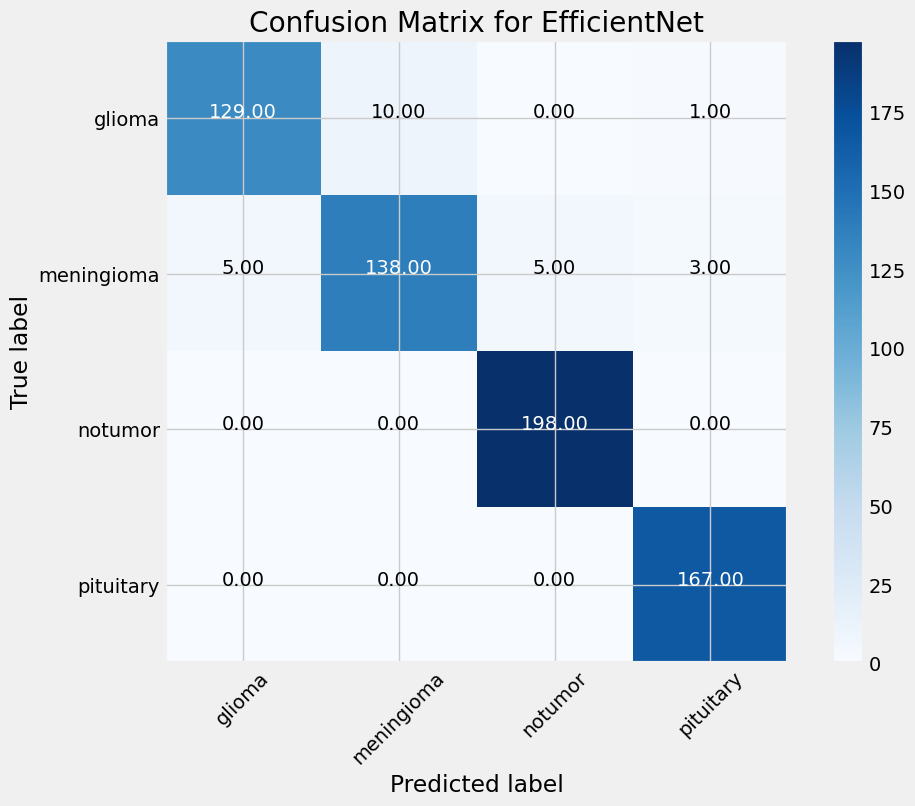

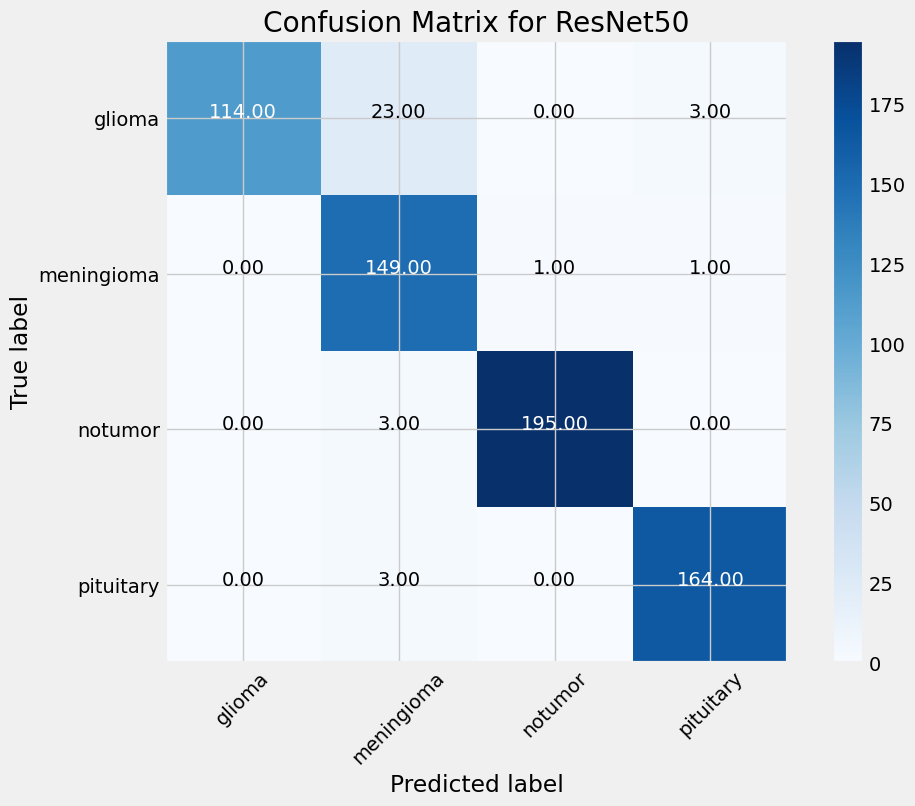

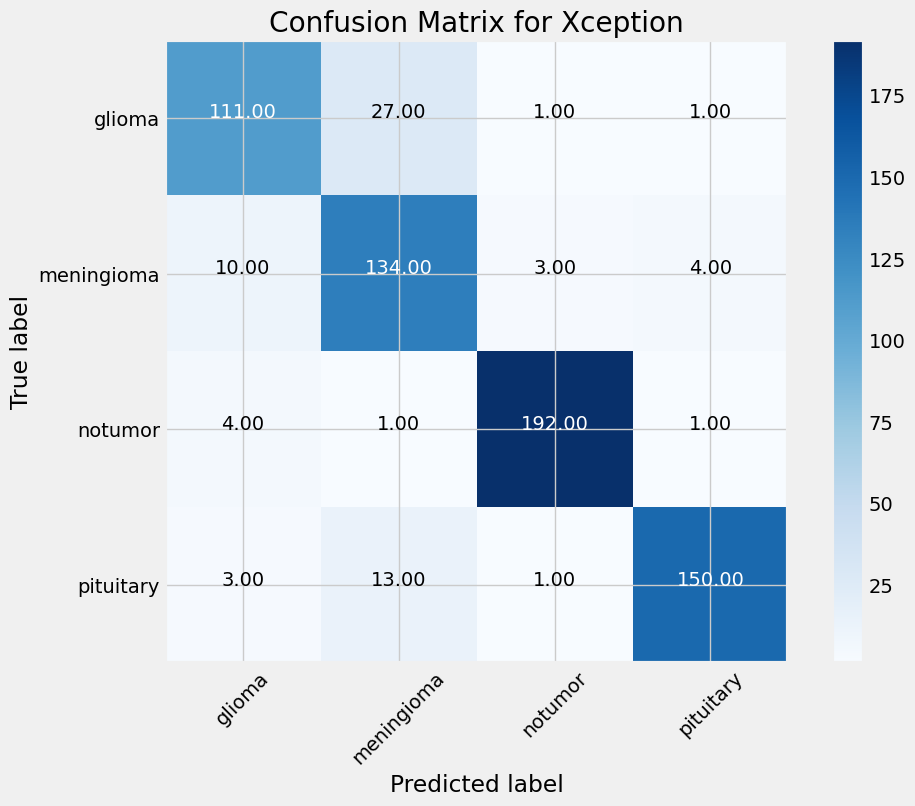

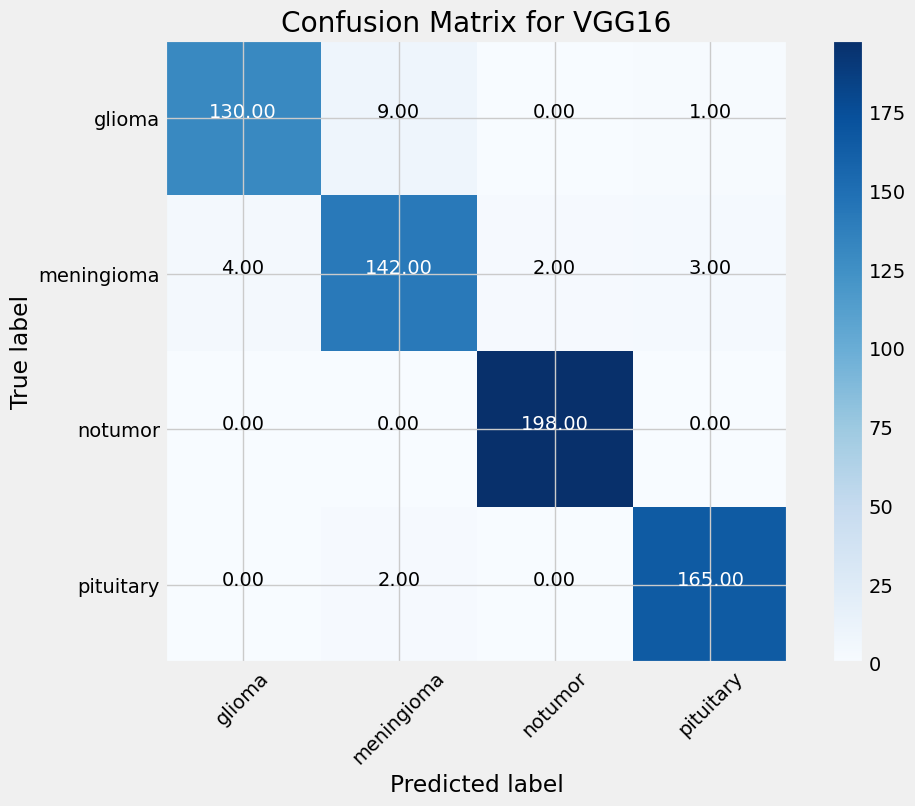

In [20]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import itertools
from tensorflow.keras.applications import EfficientNetB0, ResNet50, Xception, VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

# Function to build model
def build_model(base_model_fn):
    base_model = base_model_fn(include_top=False, weights='imagenet', input_shape=img_shape)
    base_model.trainable = False  # Freeze the base model

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(256, activation='relu'),
        Dense(class_count, activation='softmax')
    ])

    model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Function to plot ROC Curve
def plot_roc_curve(y_true, y_pred, classes):
    fpr, tpr, _ = roc_curve(y_true, y_pred, pos_label=1)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

# Load the data generators (similar to your original code)
batch_size = 16
image_size = (224, 224)

train_generator = ImageDataGenerator().flow_from_dataframe(
    train_df, x_col='filepaths', y_col='labels', target_size=image_size, class_mode='categorical', shuffle=True, batch_size=batch_size)

valid_generator = ImageDataGenerator().flow_from_dataframe(
    val_df, x_col='filepaths', y_col='labels', target_size=image_size, class_mode='categorical', shuffle=True, batch_size=batch_size)

test_generator = ImageDataGenerator().flow_from_dataframe(
    test_df, x_col='filepaths', y_col='labels', target_size=image_size, class_mode='categorical', shuffle=False, batch_size=batch_size)

# Build and train models for EfficientNet, ResNet50, Xception, VGG16
model_names = ["EfficientNet", "ResNet50", "Xception", "VGG16"]
models = [EfficientNetB0, ResNet50, Xception, VGG16]

for i, model_fn in enumerate(models):
    print(f"Training {model_names[i]} model")
    model = build_model(model_fn)

    # Train the model
    history = model.fit(train_generator, epochs=10, validation_data=valid_generator, verbose=1)

    # Evaluate on test data
    test_loss, test_acc = model.evaluate(test_generator, verbose=1)
    print(f"{model_names[i]} Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

    # Predict on test data
    y_pred = model.predict(test_generator)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = test_generator.classes

    # Classification report and confusion matrix
    print(f"Classification Report for {model_names[i]}:")
    print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(10, 8))
    plot_confusion_matrix(cm, classes=list(test_generator.class_indices.keys()), title=f'Confusion Matrix for {model_names[i]}')

    # ROC-AUC Curve (assuming binary classification for simplicity)
    if class_count == 2:
        roc_auc = roc_auc_score(y_true, y_pred[:, 1])
        print(f"ROC-AUC Score for {model_names[i]}: {roc_auc:.4f}")
        plot_roc_curve(y_true, y_pred[:, 1], classes=list(test_generator.class_indices.keys()))
    else:
        print(f"Skipping ROC Curve for multi-class classification in {model_names[i]}")

    print('-' * 60)